In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv("../artifacts/raw/raw.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
(df.isnull().sum() /len(df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Embarked'].fillna('S', inplace=True)


/var/folders/pw/fz0qvz9n0_s366s0zkgfsr4m0000gn/T/ipykernel_1648/399897443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [12]:
df['Embarked'] = df['Embarked'].map({
    'C': 0,
    'Q': 1,
    'S': 2
})


In [13]:
df['Embarked'].isnull().sum()
df['Embarked'].unique()


array([2, 0, 1])

In [14]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [16]:
df['HasCabin'].unique()

array([0, 1])

In [17]:
df.drop(columns=['Cabin','PassengerId','Ticket','Name'],inplace=True)

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [19]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize
0,0,3,0,22.0,1,0,7.2500,2,0,2
1,1,1,1,38.0,1,0,71.2833,0,1,2
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,2,1,2
4,0,3,0,35.0,0,0,8.0500,2,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   HasCabin    891 non-null    int64  
 9   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [22]:
cat_cols = df.select_dtypes(include=['object'])

num_cols = df.select_dtypes(include=['int64','float64'])

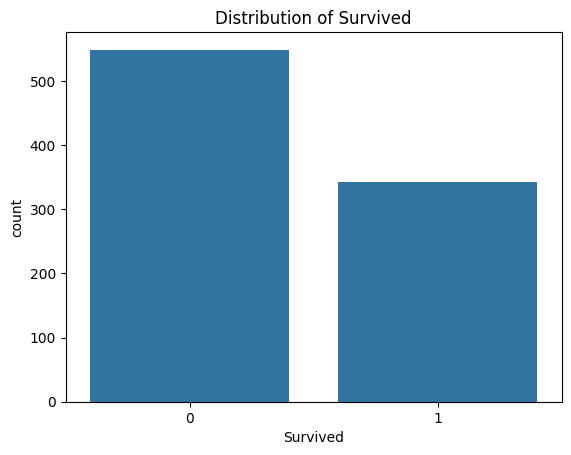

In [23]:
sns.countplot(x='Survived', data=df)
plt.title("Distribution of Survived")
plt.show()

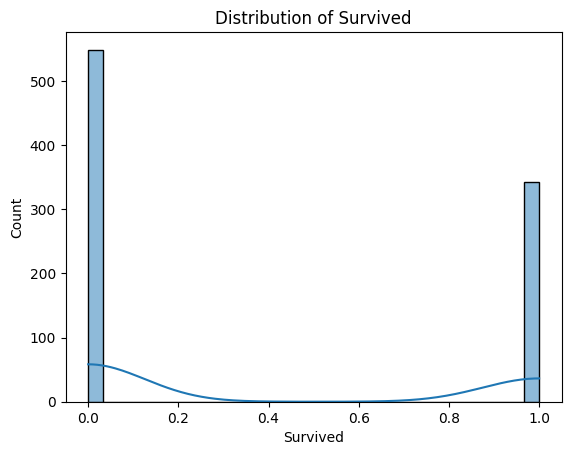

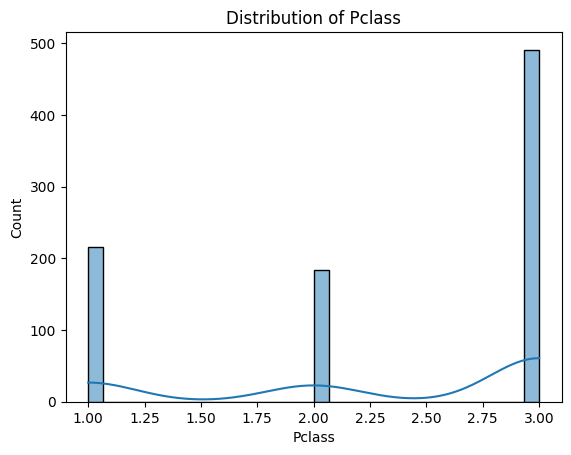

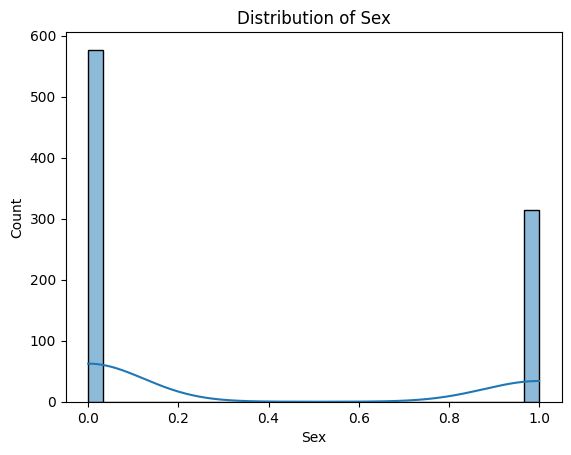

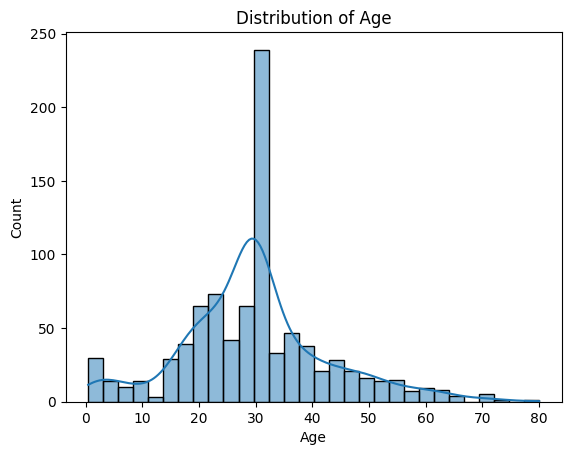

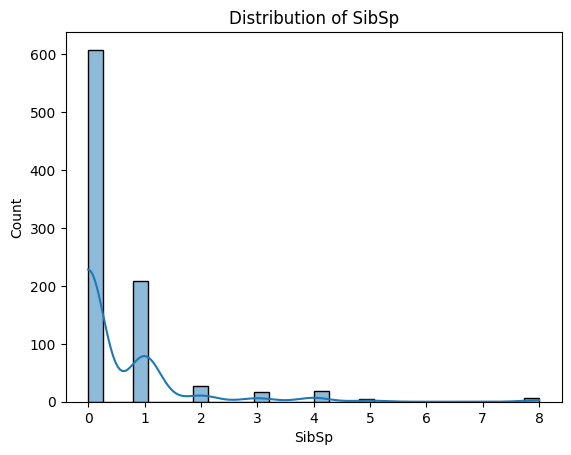

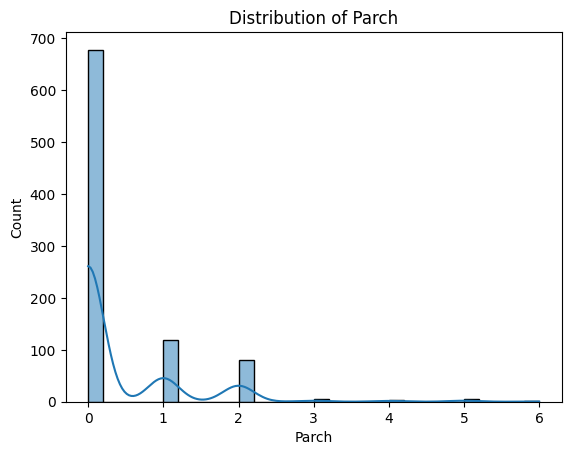

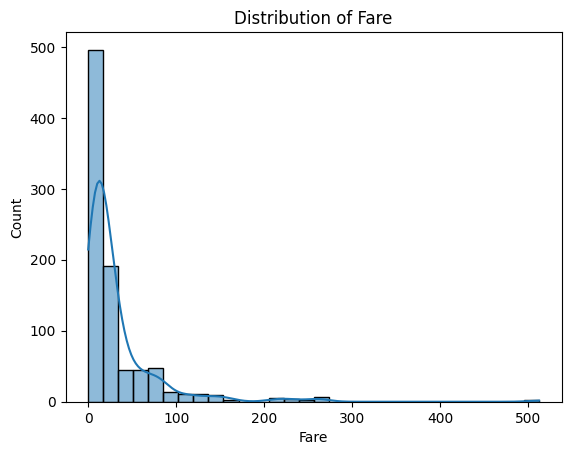

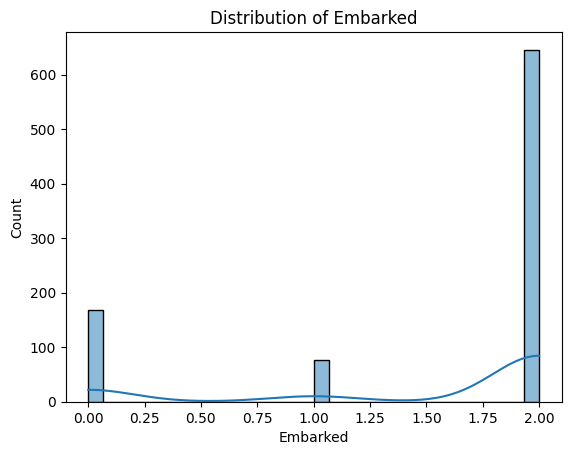

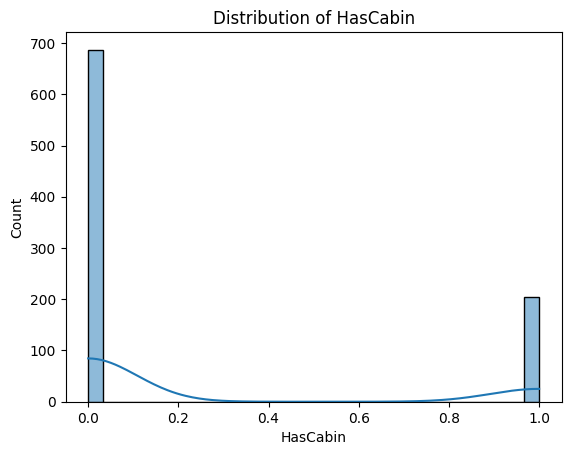

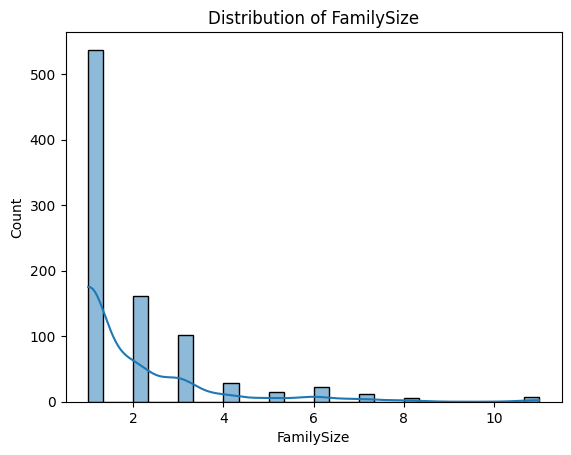

In [24]:
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

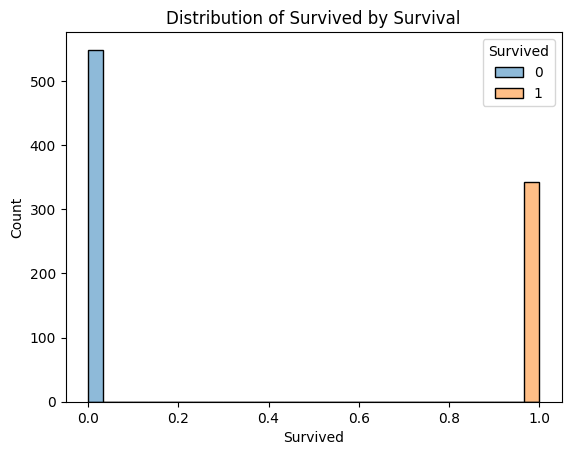

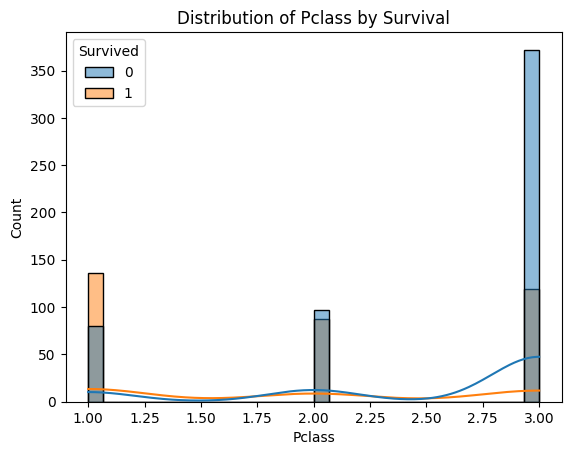

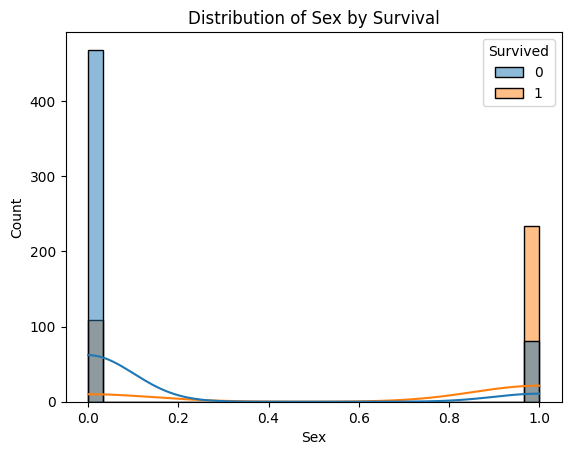

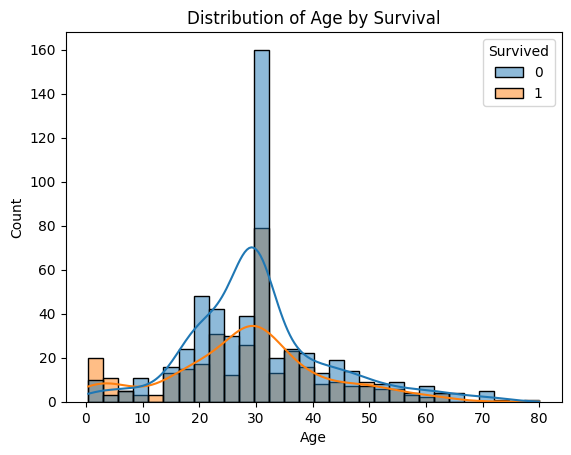

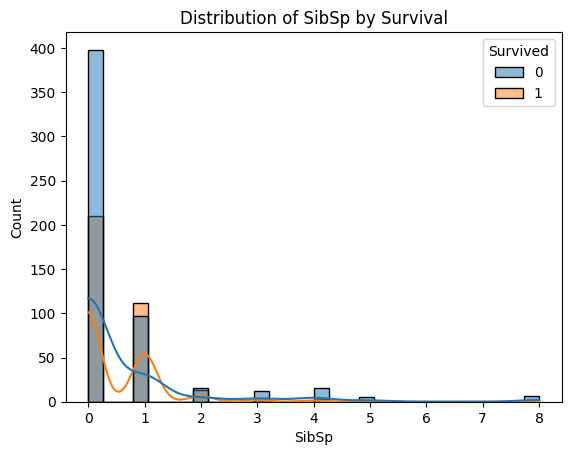

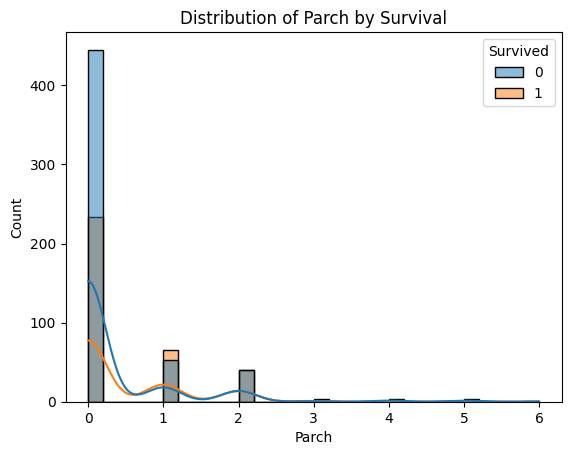

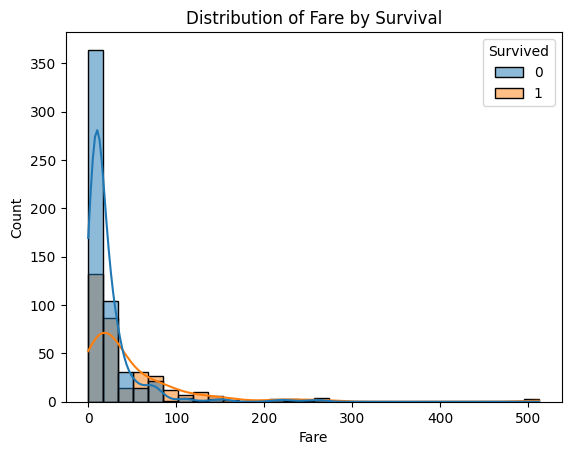

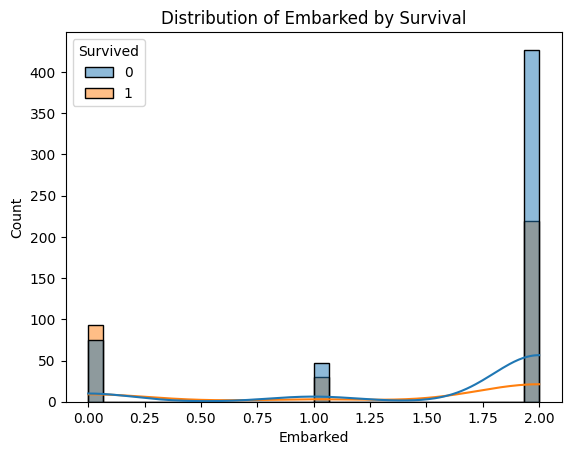

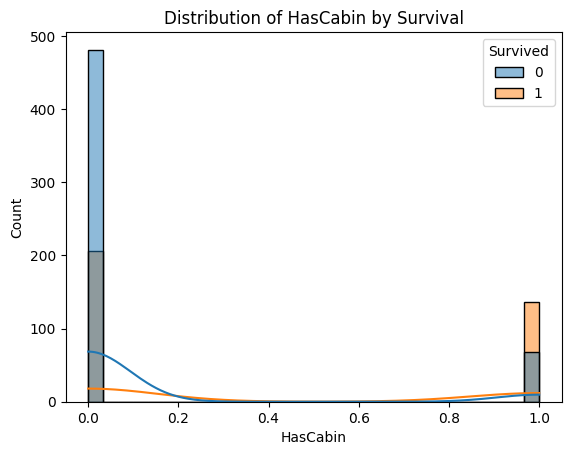

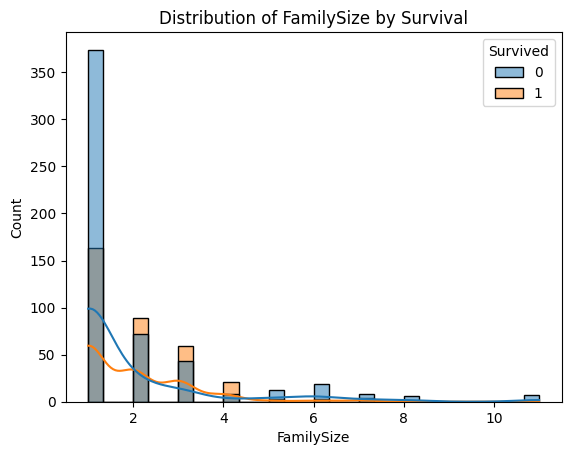

In [25]:
for col in num_cols:
    sns.histplot(data=df, x=col, hue='Survived', kde=True, bins=30)
    plt.title(f"Distribution of {col} by Survival")
    plt.show()

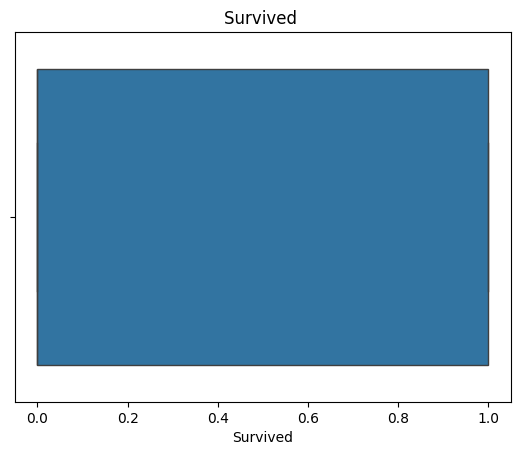

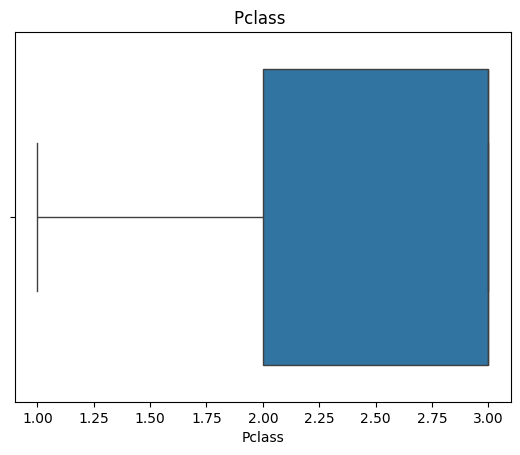

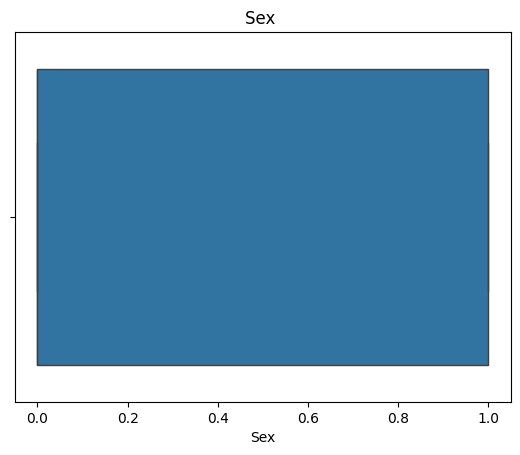

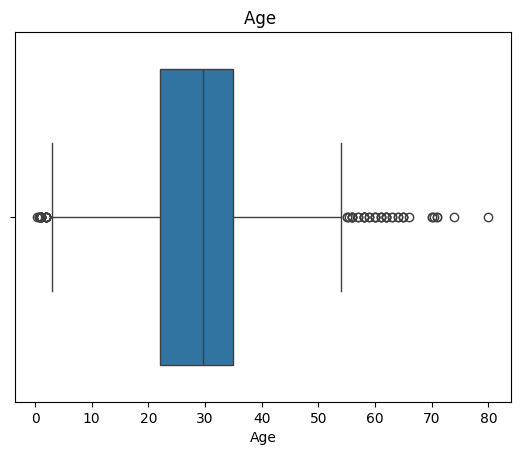

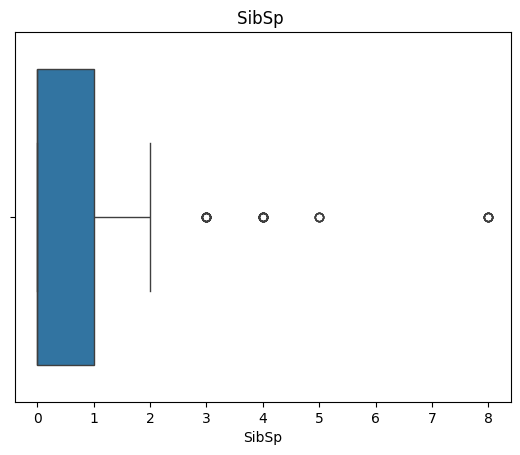

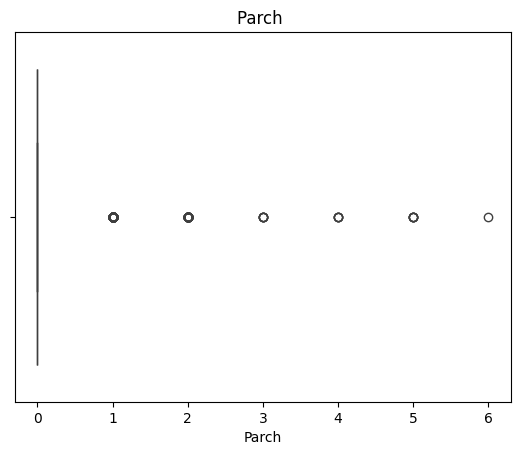

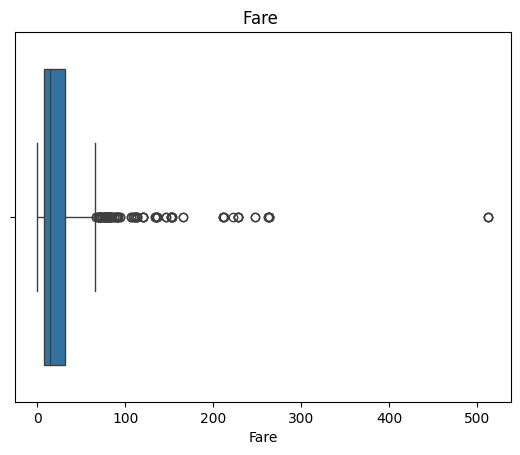

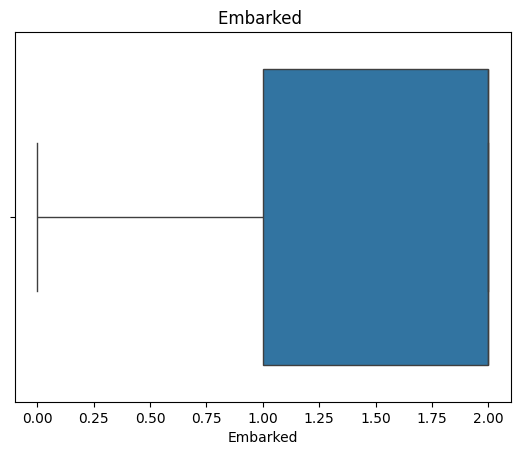

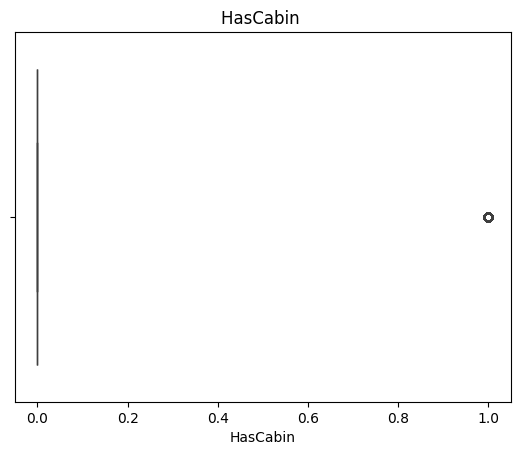

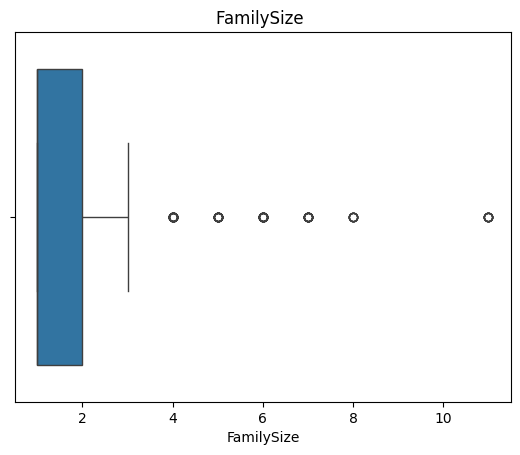

In [26]:
for col in num_cols:
    sns.boxplot(x=col, data=df)
    plt.title(f"{col} ")
    plt.show()

In [27]:
for col in cat_cols:
    sns.histplot(x=col, data=df)
    plt.title(f"{col}")
    plt.show()

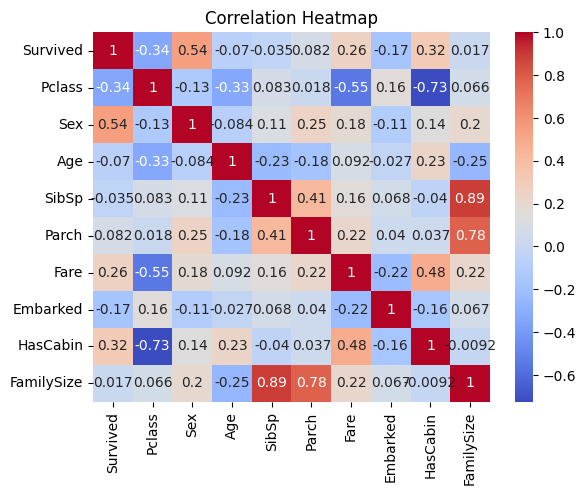

In [28]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'HasCabin']]
y = df['Survived']

from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train, y_train
)


In [43]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [44]:
y_train_resampled.value_counts()

Survived
1    439
0    439
Name: count, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score


In [32]:
models = [
    ("Linear", LogisticRegression()),
    ("RandomForest", RandomForestClassifier(n_estimators=200,random_state=42)),
    ("KNN",KNeighborsClassifier()),
    ("Desision",DecisionTreeClassifier()),
    ("ADA",AdaBoostClassifier()),
    ("XGB",XGBClassifier())
]

results = []

for name , model in models:
    
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
    
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test,y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cs = classification_report(y_test, y_pred)
    
        results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": recall,
        "F1": f1,

        })
    

In [33]:
result_df = pd.DataFrame(results)
print(result_df)

          Model  Accuracy  Precision    Recall        F1
0        Linear  0.787709   0.706667  0.768116  0.736111
1  RandomForest  0.754190   0.666667  0.724638  0.694444
2           KNN  0.681564   0.578947  0.637681  0.606897
3      Desision  0.776536   0.704225  0.724638  0.714286
4           ADA  0.770950   0.694444  0.724638  0.709220
5           XGB  0.787709   0.706667  0.768116  0.736111


In [34]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [35]:
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [36]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.79
